## Translation Noises

In [18]:
# The noises from --> Training Dataset's predictions in Step1's Model

import numpy as np
import src.models.common.MyDataset as MyDataset

Y_pred_dir = "/Users/achs/PhD/code/CT-MRI_LandmarkDetection/models/cropped/100x100x100/noises_s1_test_dis/mean_two_landmarks/straight_model/learning_rate/0.0001/09Jun20242128"

Y_gt_file = "Y_test_true.npy"
Y_pre_file = "best_val_Y_test_pred.npy"

Y_gt = np.load(f"{Y_pred_dir}/{Y_gt_file}")
Y_pre = np.load(f"{Y_pred_dir}/{Y_pre_file}")
res = 0.15

In [19]:
# voxel distance
Y_err_dis = Y_gt - Y_pre
sum_square_err_diff = np.sum(np.power(Y_err_dis, 2), axis= (1,2))
err_dis = np.sqrt(sum_square_err_diff)

min_err_idx = np.argmin(err_dis, axis=0)
max_err_idx = np.argmax(err_dis, axis=0)
print(f"Min[{min_err_idx}]: {err_dis[min_err_idx]}")
print(f"Max[{max_err_idx}]: {err_dis[max_err_idx]}")
print(f"Mean: {np.mean(err_dis)}")

Min[31]: 0.20320433378219604
Max[60]: 6.550666332244873
Mean: 1.512546420097351


## find a distribution for noises

In [20]:
## Test dataset noises Distribution
## Skew Normal Distribution

from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

a, loc, scale = 1.3, -0.1, 2.2
sample = stats.skewnorm(a, loc, scale).rvs(1000)

In [21]:
a_x, loc_x, scale_x = stats.skewnorm.fit(Y_err_dis[:, 0, 0])

a_y, loc_y, scale_y = stats.skewnorm.fit(Y_err_dis[:, 0, 1])

a_z, loc_z, scale_z = stats.skewnorm.fit(Y_err_dis[:, 0, 2])

In [22]:
print("a_x: ", a_x)
print("loc_x: ", loc_x)
print("scale-x: ", scale_x)

print("a_y: ", a_y)
print("loc_y: ", loc_y)
print("scale-y: ", scale_y)

print("a_z: ", a_z)
print("loc_z: ", loc_z)
print("scale-z: ", scale_z)

a_x:  4.9396562103051656
loc_x:  -1.49221039234107
scale-x:  2.0207709915290613
a_y:  3.2990868932406605
loc_y:  -1.1582712844785075
scale-y:  1.042642772558547
a_z:  6.087152892925824
loc_z:  -1.2032667243435533
scale-z:  1.1347069248069848


In [23]:
sn_x = stats.skewnorm(a_x, loc_x, scale_x)
x = np.linspace(sn_x.ppf(0.01), sn_x.ppf(0.99), 400)

sn_y = stats.skewnorm(a_y, loc_y, scale_y)
y = np.linspace(sn_y.ppf(0.01), sn_y.ppf(0.99), 400)

sn_z = stats.skewnorm(a_z, loc_z, scale_z)
z = np.linspace(sn_z.ppf(0.01), sn_z.ppf(0.99), 400)

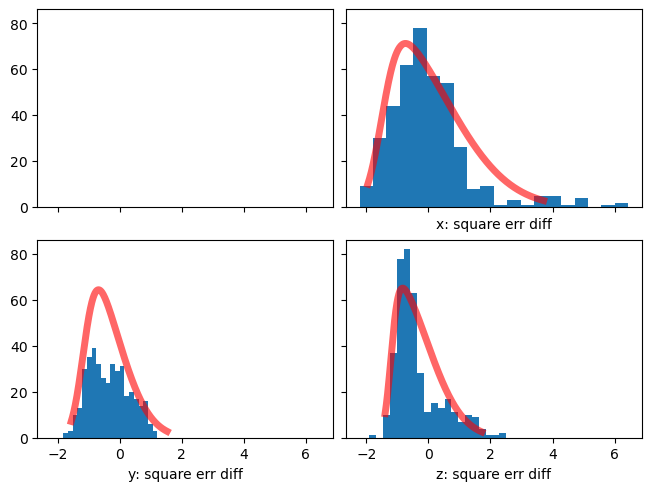

In [24]:
from matplotlib import pyplot

fig, axs = pyplot.subplots(2, 2, sharex=True, sharey=True, constrained_layout=True)

# axs[0][0].hist(sum_square_err_diff, 20)
# axs[0][0].set_xlabel("sum square err diff")

axs[0][1].hist(Y_err_dis[:, 0, 0], 20)
axs[0][1].set_xlabel("x: square err diff")
axs[0][1].plot(x, sn_x.pdf(x)*200, 'r-', lw=5, alpha=0.6)

axs[1][0].hist(Y_err_dis[:, 0, 1], 20)
axs[1][0].set_xlabel("y: square err diff")
axs[1][0].plot(y, sn_y.pdf(y)*100, 'r-', lw=5, alpha=0.6)

axs[1][1].hist(Y_err_dis[:, 0, 2], 20)
axs[1][1].set_xlabel("z: square err diff")
axs[1][1].plot(z, sn_z.pdf(z)*100, 'r-', lw=5, alpha=0.6)

pyplot.show()


In [25]:
s1_pred_test_dis_array = np.zeros((2000, 1, 3))
s1_pred_test_dis_array[:, 0, 0] = sn_x.rvs(size=2000)
s1_pred_test_dis_array[:, 0, 1] = sn_y.rvs(size=2000)
s1_pred_test_dis_array[:, 0, 2] = sn_z.rvs(size=2000)

In [26]:
# convert to distance in mm
s1_pred_test_dis_array = s1_pred_test_dis_array * 0.15

In [27]:
check_r_p2 = np.sum(np.power(s1_pred_test_dis_array, 2), axis= (1,2))
check_r = np.sqrt(check_r_p2)

print(np.mean(check_r, axis=0))

0.2267419751018431


In [28]:
file_name = "noises_s1.5_test_dis"
np.save(f"{Y_pred_dir}/{file_name}", s1_pred_test_dis_array)